# Machine Learning with H2O - Tutorial 4a: Classification Models (Basics)

<hr>

**Objective**:

- This tutorial explains how to build classification models with four different H2O algorithms.

<hr>

**Titanic Dataset:**

- Source: https://www.kaggle.com/c/titanic/data

<hr>
    
**Algorithms**:

1. GLM
2. DRF
3. GBM
4. DNN


<hr>

**Full Technical Reference:**

- http://docs.h2o.ai/h2o/latest-stable/h2o-py/docs/modeling.html

<br>


In [1]:
# Start and connect to a local H2O cluster
import h2o
h2o.init(nthreads = -1)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_121"; Java(TM) SE Runtime Environment (build 1.8.0_121-b13); Java HotSpot(TM) 64-Bit Server VM (build 25.121-b13, mixed mode)
  Starting server from /home/joe/anaconda3/lib/python3.5/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpc51uiow3
  JVM stdout: /tmp/tmpc51uiow3/h2o_joe_started_from_python.out
  JVM stderr: /tmp/tmpc51uiow3/h2o_joe_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,01 secs
H2O cluster version:,3.10.3.5
H2O cluster version age:,6 days
H2O cluster name:,H2O_from_python_joe_claf03
H2O cluster total nodes:,1
H2O cluster free memory:,5.210 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"
H2O connection url:,http://127.0.0.1:54321
H2O connection proxy:,None


<br>

In [4]:
# Import Titanic data (local CSV)
titanic = h2o.import_file("kaggle_titanic.csv")
titanic.head(5)

Parse progress: |█████████████████████████████████████████████████████████| 100%


PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,nan,7.25,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,nan,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,nan,7.925,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,,S


In [8]:
# Convert 'Survived' and 'Pclass' to categorical values
titanic['Survived'] = titanic['Survived'].asfactor()
titanic['Pclass'] = titanic['Pclass'].asfactor()

In [10]:
titanic['Survived'].table()

Survived,Count
0,549
1,342


In [12]:
titanic['Pclass'].table()

Pclass,Count
1,216
2,184
3,491


In [13]:
titanic['Sex'].table()

Sex,Count
female,314
male,577


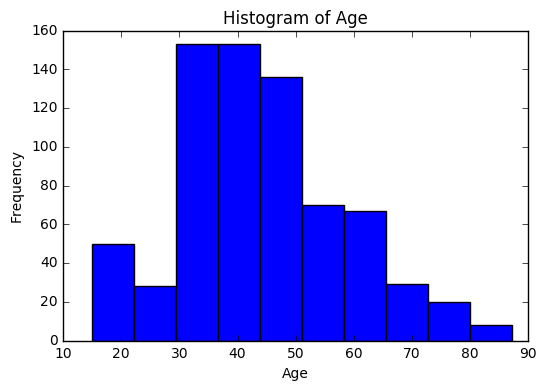

In [14]:
titanic['Age'].hist()

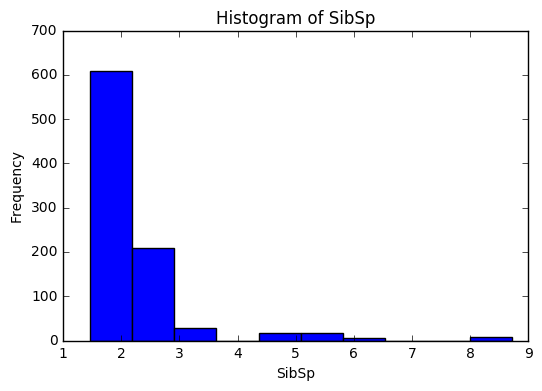

In [15]:
titanic['SibSp'].hist()

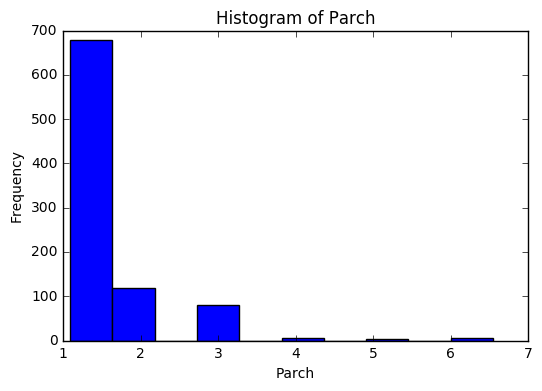

In [16]:
titanic['Parch'].hist()

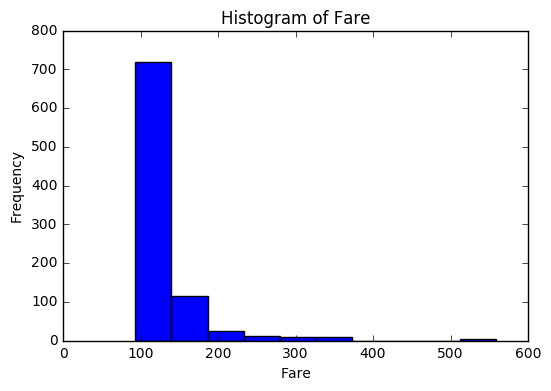

In [18]:
titanic['Fare'].hist()

In [22]:
titanic['Embarked'].table()

Embarked,Count
C,168
Q,77
S,644


In [23]:
# Define features (or predictors) manually
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [25]:
# Split the H2O data frame into training/test sets
# so we can evaluate out-of-bag performance
titanic_split = titanic.split_frame(ratios = [0.8], seed = 1234)

titanic_train = titanic_split[0] # using 80% for training
titanic_test = titanic_split[1]  # using the rest 20% for out-of-bag evaluation

In [26]:
titanic_train.shape

(712, 12)

In [27]:
titanic_test.shape

(179, 12)

<br>

## Generalized Linear Model

In [29]:
# Build a Generalized Linear Model (GLM) with default settings

# Import the function for GLM
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

# Set up GLM for binary classification
glm_default = H2OGeneralizedLinearEstimator(family = 'binomial', model_id = 'glm_default')

# Use .train() to build the model
glm_default.train(x = features, 
                  y = 'Survived', 
                  training_frame = titanic_train)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [30]:
# Check the model performance on training dataset
glm_default

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  glm_default


ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.1382288206898215
RMSE: 0.37179136715343664
LogLoss: 0.4365971276608109
Null degrees of freedom: 711
Residual degrees of freedom: 700
Null deviance: 939.9987544934203
Residual deviance: 621.7143097889948
AIC: 645.7143097889948
AUC: 0.8541387024608501
Gini: 0.7082774049217002
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.326408717958219: 


,0,1,Error,Rate
0,354.0,93.0,0.2081,(93.0/447.0)
1,54.0,211.0,0.2038,(54.0/265.0)
Total,408.0,304.0,0.2065,(147.0/712.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3264087,0.7416520,231.0
max f2,0.2662247,0.7879656,251.0
max f0point5,0.6655020,0.8023379,122.0
max accuracy,0.6655020,0.8146067,122.0
max precision,0.9710368,1.0,0.0
max recall,0.0497483,1.0,384.0
max specificity,0.9710368,1.0,0.0
max absolute_mcc,0.6655020,0.6016370,122.0
max min_per_class_accuracy,0.3403702,0.7919463,230.0
max mean_per_class_accuracy,0.3264087,0.7940864,231.0


Gains/Lift Table: Avg response rate: 37.22 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0112360,0.9610609,2.6867925,2.6867925,1.0,1.0,0.0301887,0.0301887,168.6792453,168.6792453
,2,0.0210674,0.9552300,2.6867925,2.6867925,1.0,1.0,0.0264151,0.0566038,168.6792453,168.6792453
,3,0.0308989,0.9519189,2.6867925,2.6867925,1.0,1.0,0.0264151,0.0830189,168.6792453,168.6792453
,4,0.0407303,0.9421320,2.6867925,2.6867925,1.0,1.0,0.0264151,0.1094340,168.6792453,168.6792453
,5,0.0505618,0.9334337,2.6867925,2.6867925,1.0,1.0,0.0264151,0.1358491,168.6792453,168.6792453
,6,0.1011236,0.8705719,2.5375262,2.6121593,0.9444444,0.9722222,0.1283019,0.2641509,153.7526205,161.2159329
,7,0.1502809,0.7799310,2.6100270,2.6114618,0.9714286,0.9719626,0.1283019,0.3924528,161.0026954,161.1461823
,8,0.2008427,0.7067333,1.9404612,2.4425386,0.7222222,0.9090909,0.0981132,0.4905660,94.0461216,144.2538593
,9,0.3005618,0.5934800,1.5515280,2.1469229,0.5774648,0.7990654,0.1547170,0.6452830,55.1528036,114.6922941
,10,0.4002809,0.4039384,1.1731066,1.9043231,0.4366197,0.7087719,0.1169811,0.7622642,17.3106564,90.4323072



Scoring History: 


,timestamp,duration,iteration,negative_log_likelihood,objective
,2017-02-24 14:57:12,0.000 sec,0,469.9993772,0.6601115
,2017-02-24 14:57:12,0.024 sec,1,319.4025691,0.4494054
,2017-02-24 14:57:12,0.028 sec,2,311.1902527,0.4382131
,2017-02-24 14:57:12,0.030 sec,3,310.8603386,0.4378358
,2017-02-24 14:57:12,0.033 sec,4,310.8571549,0.4378367


In [31]:
# Check the model performance on test dataset
glm_default.model_performance(titanic_test)


ModelMetricsBinomialGLM: glm
** Reported on test data. **

MSE: 0.14604424271085578
RMSE: 0.38215735333872064
LogLoss: 0.46125694368411685
Null degrees of freedom: 178
Residual degrees of freedom: 167
Null deviance: 247.17154578244123
Residual deviance: 165.12998583891383
AIC: 189.12998583891383
AUC: 0.8584797555385791
Gini: 0.7169595110771583
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.6037543251670895: 


,0,1,Error,Rate
0,96.0,6.0,0.0588,(6.0/102.0)
1,24.0,53.0,0.3117,(24.0/77.0)
Total,120.0,59.0,0.1676,(30.0/179.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.6037543,0.7794118,55.0
max f2,0.1357796,0.8391608,113.0
max f0point5,0.6037543,0.8466454,55.0
max accuracy,0.6037543,0.8324022,55.0
max precision,0.8170662,0.9629630,26.0
max recall,0.0628163,1.0,153.0
max specificity,0.9715229,0.9901961,0.0
max absolute_mcc,0.6037543,0.6630044,55.0
max min_per_class_accuracy,0.4656981,0.7532468,73.0
max mean_per_class_accuracy,0.6037543,0.8147441,55.0


Gains/Lift Table: Avg response rate: 43.02 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0111732,0.9640618,1.1623377,1.1623377,0.5,0.5,0.0129870,0.0129870,16.2337662,16.2337662
,2,0.0223464,0.9548586,2.3246753,1.7435065,1.0,0.75,0.0259740,0.0389610,132.4675325,74.3506494
,3,0.0335196,0.9467517,2.3246753,1.9372294,1.0,0.8333333,0.0259740,0.0649351,132.4675325,93.7229437
,4,0.0446927,0.9327764,2.3246753,2.0340909,1.0,0.875,0.0259740,0.0909091,132.4675325,103.4090909
,5,0.0502793,0.9178485,2.3246753,2.0663781,1.0,0.8888889,0.0129870,0.1038961,132.4675325,106.6378066
,6,0.1005587,0.8898986,2.3246753,2.1955267,1.0,0.9444444,0.1168831,0.2207792,132.4675325,119.5526696
,7,0.1508380,0.8139070,2.3246753,2.2385762,1.0,0.9629630,0.1168831,0.3376623,132.4675325,123.8576239
,8,0.2011173,0.7735290,2.0663781,2.1955267,0.8888889,0.9444444,0.1038961,0.4415584,106.6378066,119.5526696
,9,0.3016760,0.6387205,1.8080808,2.0663781,0.7777778,0.8888889,0.1818182,0.6233766,80.8080808,106.6378066
,10,0.4022346,0.4916867,1.0331890,1.8080808,0.4444444,0.7777778,0.1038961,0.7272727,3.3189033,80.8080808


<br>

## Distributed Random Forest

In [10]:
# Build a Distributed Random Forest (DRF) model with default settings

# Import the function for DRF
from h2o.estimators.random_forest import H2ORandomForestEstimator

# Set up DRF for regression
# Add a seed for reproducibility
drf_default = H2ORandomForestEstimator(model_id = 'drf_default', seed = 1234)

# Use .train() to build the model
drf_default.train(x = features, 
                  y = 'quality', 
                  training_frame = wine_train)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [11]:
# Check the DRF model summary
drf_default

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  drf_default


ModelMetricsRegression: drf
** Reported on train data. **

MSE: 0.3786311991201336
RMSE: 0.615330154567557
MAE: 0.4423354990678668
RMSLE: 0.09221859689553939
Mean Residual Deviance: 0.3786311991201336
Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
,2017-02-24 14:29:03,0.010 sec,0.0,nan,nan,nan
,2017-02-24 14:29:03,0.279 sec,1.0,0.9087144,0.5780743,0.8257618
,2017-02-24 14:29:04,0.354 sec,2.0,0.8919799,0.5738643,0.7956282
,2017-02-24 14:29:04,0.413 sec,3.0,0.8502710,0.5492569,0.7229608
,2017-02-24 14:29:04,0.469 sec,4.0,0.8352497,0.5485249,0.6976421
---,---,---,---,---,---,---
,2017-02-24 14:29:05,1.848 sec,46.0,0.6177766,0.4440441,0.3816479
,2017-02-24 14:29:05,1.870 sec,47.0,0.6170476,0.4438940,0.3807478
,2017-02-24 14:29:05,1.890 sec,48.0,0.6163446,0.4433232,0.3798807
,2017-02-24 14:29:05,1.912 sec,49.0,0.6162188,0.4431046,0.3797256



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
alcohol,20878.3164062,1.0,0.2070740
density,11681.6083984,0.5595091,0.1158598
free sulfur dioxide,10304.6474609,0.4935574,0.1022029
volatile acidity,10046.6591797,0.4812006,0.0996441
total sulfur dioxide,7576.9418945,0.3629096,0.0751491
chlorides,7170.6318359,0.3434488,0.0711193
pH,6974.2666016,0.3340435,0.0691717
residual sugar,6736.8276367,0.3226710,0.0668168
fixed acidity,6671.1586914,0.3195257,0.0661655
citric acid,6666.0361328,0.3192803,0.0661146


In [12]:
# Check the model performance on test dataset
drf_default.model_performance(wine_test)


ModelMetricsRegression: drf
** Reported on test data. **

MSE: 0.39639765836475405
RMSE: 0.6296011899327654
MAE: 0.4470666172070494
RMSLE: 0.0956471646937074
Mean Residual Deviance: 0.39639765836475405


<br>

## Gradient Boosting Machines

In [13]:
# Build a Gradient Boosting Machines (GBM) model with default settings

# Import the function for GBM
from h2o.estimators.gbm import H2OGradientBoostingEstimator

# Set up GBM for regression
# Add a seed for reproducibility
gbm_default = H2OGradientBoostingEstimator(model_id = 'gbm_default', seed = 1234)

# Use .train() to build the model
gbm_default.train(x = features, 
                  y = 'quality', 
                  training_frame = wine_train)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [14]:
# Check the GBM model summary
gbm_default

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  gbm_default


ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.3279901359237029
RMSE: 0.5727042307541502
MAE: 0.4468592957574494
RMSLE: 0.08454073238229556
Mean Residual Deviance: 0.3279901359237029
Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
,2017-02-24 14:29:06,0.004 sec,0.0,0.8782356,0.6676549,0.7712978
,2017-02-24 14:29:06,0.074 sec,1.0,0.8470435,0.6414797,0.7174826
,2017-02-24 14:29:06,0.092 sec,2.0,0.8205102,0.6196456,0.6732370
,2017-02-24 14:29:06,0.108 sec,3.0,0.7978752,0.6061423,0.6366049
,2017-02-24 14:29:06,0.132 sec,4.0,0.7779741,0.5961975,0.6052437
---,---,---,---,---,---,---
,2017-02-24 14:29:06,0.696 sec,46.0,0.5786491,0.4516237,0.3348347
,2017-02-24 14:29:06,0.705 sec,47.0,0.5775187,0.4506466,0.3335279
,2017-02-24 14:29:06,0.713 sec,48.0,0.5770047,0.4500542,0.3329344
,2017-02-24 14:29:06,0.721 sec,49.0,0.5749100,0.4484259,0.3305215



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
alcohol,3443.4946289,1.0,0.3760723
volatile acidity,1333.1967773,0.3871639,0.1456016
free sulfur dioxide,1227.8638916,0.3565749,0.1340980
residual sugar,572.8696289,0.1663629,0.0625645
pH,529.3963623,0.1537381,0.0578166
citric acid,438.0522766,0.1272115,0.0478407
fixed acidity,384.2873535,0.1115981,0.0419689
chlorides,319.1284485,0.0926758,0.0348528
sulphates,317.8505859,0.0923047,0.0347132
total sulfur dioxide,313.2650452,0.0909730,0.0342124


In [15]:
# Check the model performance on test dataset
gbm_default.model_performance(wine_test)


ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 0.4982022441718445
RMSE: 0.7058344311322907
MAE: 0.545334849281441
RMSLE: 0.10596392876553129
Mean Residual Deviance: 0.4982022441718445


<br>

## H2O Deep Learning

In [16]:
# Build a Deep Learning (Deep Neural Networks, DNN) model with default settings

# Import the function for DNN
from h2o.estimators.deeplearning import H2ODeepLearningEstimator

# Set up DNN for regression
dnn_default = H2ODeepLearningEstimator(model_id = 'dnn_default')

# (not run) Change 'reproducible' to True if you want to reproduce the results
# The model will be built using a single thread (could be very slow)
# dnn_default = H2ODeepLearningEstimator(model_id = 'dnn_default', reproducible = True)

# Use .train() to build the model
dnn_default.train(x = features, 
                  y = 'quality', 
                  training_frame = wine_train)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [17]:
# Check the DNN model summary
dnn_default

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  dnn_default


ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 0.43786400091608246
RMSE: 0.6617129293856079
MAE: 0.5095157254634646
RMSLE: 0.09753833427573282
Mean Residual Deviance: 0.43786400091608246
Scoring History: 


,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae
,2017-02-24 14:29:07,0.000 sec,None,0.0,0,0.0,nan,nan,nan
,2017-02-24 14:29:08,1.857 sec,5781 obs/sec,1.0,1,3920.0,0.7517084,0.5650655,0.5805199
,2017-02-24 14:29:10,3.825 sec,15100 obs/sec,10.0,10,39200.0,0.6617129,0.4378640,0.5095157


In [18]:
# Check the model performance on test dataset
dnn_default.model_performance(wine_test)


ModelMetricsRegression: deeplearning
** Reported on test data. **

MSE: 0.5250970590349768
RMSE: 0.7246358113114317
MAE: 0.5599060268088915
RMSLE: 0.10771735822508255
Mean Residual Deviance: 0.5250970590349768


<br>

## Making Predictions

In [19]:
# Use GLM model to make predictions
yhat_test_glm = glm_default.predict(wine_test)
yhat_test_glm.head(5)

glm prediction progress: |████████████████████████████████████████████████| 100%


predict
5.51509
5.73903
5.49107
5.48028
5.91343


In [20]:
# Use DRF model to make predictions
yhat_test_drf = drf_default.predict(wine_test)
yhat_test_drf.head(5)

drf prediction progress: |████████████████████████████████████████████████| 100%


predict
5.70643
5.71689
5.86
5.7
5.99533


In [21]:
# Use GBM model to make predictions
yhat_test_gbm = gbm_default.predict(wine_test)
yhat_test_gbm.head(5)

gbm prediction progress: |████████████████████████████████████████████████| 100%


predict
5.52585
5.88708
5.63179
5.66957
5.9565


In [22]:
# Use DNN model to make predictions
yhat_test_dnn = dnn_default.predict(wine_test)
yhat_test_dnn.head(5)

deeplearning prediction progress: |███████████████████████████████████████| 100%


predict
5.5508
5.64736
5.93948
5.5074
6.09279


<br>